# Name: Hanan Fared Mohamed Omara , ID =  20398559

# Data Science LifeCycle 🤓
- Business Understanding 
 - the dataset combined with some available data. Some nosies are added to the dataset and is not clean so we need to clean it well , The goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings are in categories from 1 to 5. as 5 is the highest rate which mean it is good to buy.
- Load Dataset 😃
  - The dataset is the wish.com product dataset.
  - Dataset on kaggle include two parts (train dataset,test dataset)
- Data Preprataion 🧐
  - Check duplication
  - Check null
  - check unique
-Feature Engineering
-Modeling
  - do different models at least 5 times
    - Two different model using Naive bayes
    - Two different model using support vector machine
    - Decision tree model
    - Random Forest model
- Model Evaluation 🥳      
  - Evalute on training dataset and on validation dataset
  - Calculate accuracy,precision,recalland `f1-score`
  - print the Classification report 🤔     




## Define the problem. What is the input? What is the output?
- The problem is to predict the product ratings of Wish.com products based on other features of the products. The input is the various features of the products such as product type, description, price, and image, among 
Others The output is the predicted product rating, which is in categories from 1 to 5. The goal is to estimate how
 likely people will like a product and understand the conditions under which a product will be highly rated


## What data mining function is required?
- The data mining function required is classification since the goal is to predict the product rating
 based on other features of the product


## What could be the challenges? 🤯
- The challenges could include dealing with noisy data, missing values, and irrelevant or unnecessary features.
 Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering and also i have problem when call `get_dummies` on train dataset and test dataset as the columns results in both are very different

## What is the impact?
- The impact of accurately predicting the product rating is that it can help businesses understand their customer
 base and tailor their products to meet customer preferences. It can also help businesses identify the features 
that are most important to customers, which can inform product development and marketing strategies.



## What is an ideal solution? 🤔
- My experiment tries to reach to the highest accuracy(f1-score) to predict correct and gives the best benefits to clients, in general, an ideal solution would be to develop a machine learning model that accurately predicts 
the product rating based on the available features, while also being able to handle missing or noisy data. The model should also be easily interpretable, so that businesses can understand the factors that are most important for predicting product ratings. Additionally, the model should be regularly updated with new data to ensure its accuracy over time and develope it regulary.


##Import Libraries

In [113]:
#import all the important libraries which we need in our experiment.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
#from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree


## Load dataset

In [114]:
#load the train and test dataset to our notebook
train_df = pd.read_csv('/content/train_new.csv')
test_df = pd.read_csv('/content/test_new.csv')

## preparation of train set

In [115]:
#make a variable hold the values of id from test dataset
id=test_df["id"]

In [116]:
#check the type of train data
train_df['id'].dtype

dtype('int64')

In [117]:
#check the type of column called rating
train_df['rating'].dtype

dtype('float64')

In [118]:
#check the shape of train dataset
train_df.shape

(1094, 34)

In [119]:
# make a copy of dataset to can do different preprocessing on it
train_data = train_df.copy()


In [120]:
#show the first 5 rows in data
train_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [121]:
# describe the statistical of data
train_data.describe()


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


### check duplication


In [122]:
#for train 
duplicated= train_data[train_data.duplicated()]
duplicated


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id


### check Null

In [123]:
#check the null cells in train data
train_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

### check unique data

In [124]:
def check_unique(df):
  ls=[]
  for col in df.columns:
    n=df[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and df[col].dtypes == object:
      ls.append(col)
  return ls

In [125]:

#for train 
drop_column=check_unique(train_data)
drop_column


['currency_buyer',
 'tags',
 'has_urgency_banner',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'theme',
 'crawl_month']

In [126]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it 
train_data.urgency_text.value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [127]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it
train_data.urgency_text.value_counts()

Quantité limitée !                  348
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [128]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it
train_data.inventory_total.value_counts()

50    1089
1        1
9        1
37       1
2        1
36       1
Name: inventory_total, dtype: int64

In [129]:
# make a a list of different columns which we see useless
dropped=["currency_buyer","merchant_name","merchant_info_subtitle","merchant_id","merchant_profile_picture",
         "merchant_has_profile_picture","theme","crawl_month","id","has_urgency_banner","urgency_text","tags","inventory_total","origin_country"]
train_data.drop(dropped, axis=1, inplace=True)

In [130]:
#check the shape
train_data.shape

(1094, 20)

In [131]:
# show the head of datato understand it well 
train_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_title,merchant_rating_count,merchant_rating
0,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,M,50,Livraison standard,3,0,30,keepahorse,66644,4.137582
1,8.00,7,1000,0,4.0,843,1,1,0,0,black,L,50,Livraison standard,3,0,37,shanghaimingqidianqikejiyouxiangongsi,25752,4.256873
2,6.00,34,100,0,4.0,10,0,0,0,0,white,L,50,Livraison standard,2,0,41,zhaodongmei,3897,3.928920
3,4.67,4,100,1,3.0,82,0,0,0,0,lakeblue,XS,5,Livraison standard,1,0,25,pookie0331,7497,4.079365
4,8.00,11,1000,0,4.0,127,0,0,0,0,apricot,S,50,Livraison standard,3,0,15,shitongyi12683626,173,4.306358


## Data cleaning

In [132]:
# spilt  train data to x(features) and target column(y)
X = train_data.drop(columns=["shipping_option_name","merchant_title","rating",'product_color'])
y = train_data["rating"]

X.shape

(1094, 16)

In [133]:
y.shape

(1094,)

In [134]:
X.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_size_id      12
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
merchant_rating_count           0
merchant_rating                 0
dtype: int64

In [135]:
X.mode().iloc[0]

price                              8.0
retail_price                         7
units_sold                         100
uses_ad_boosts                       0
rating_count                         0
badges_count                         0
badge_local_product                  0
badge_product_quality                0
badge_fast_shipping                  0
product_variation_size_id            S
product_variation_inventory         50
shipping_option_price                2
shipping_is_express                  0
countries_shipped_to                41
merchant_rating_count            12309
merchant_rating                4.04517
Name: 0, dtype: object

In [136]:
# fill the null value with the value stored in "col" to clean our data from any missing data 
col=['product_variation_size_id']
X[col]=X[col].fillna(X.mode().iloc[0])

In [137]:
#check gain if there is any missing data or null 
#finally there is no null on data 💃💃💃💃💃
X.isnull().sum()  

price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
merchant_rating_count          0
merchant_rating                0
dtype: int64

In [138]:
# show all the information of train data 
# we notic that there is only one object 🤩🤩🤩 so we will use get dummies to convert it into one-hotencoding
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1094 non-null   float64
 1   retail_price                 1094 non-null   int64  
 2   units_sold                   1094 non-null   int64  
 3   uses_ad_boosts               1094 non-null   int64  
 4   rating_count                 1094 non-null   int64  
 5   badges_count                 1094 non-null   int64  
 6   badge_local_product          1094 non-null   int64  
 7   badge_product_quality        1094 non-null   int64  
 8   badge_fast_shipping          1094 non-null   int64  
 9   product_variation_size_id    1094 non-null   object 
 10  product_variation_inventory  1094 non-null   int64  
 11  shipping_option_price        1094 non-null   int64  
 12  shipping_is_express          1094 non-null   int64  
 13  countries_shipped_

In [139]:
# check the correlation between all features to benefits of it if there is any high correlation between features
corr = X.corr()
corr

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
price,1.000000,0.321920,-0.008284,-0.053380,0.012339,0.086400,0.088888,0.021911,0.109321,0.273091,0.887445,0.208582,-0.034094,-0.022850,0.066437
retail_price,0.321920,1.000000,0.027722,-0.006258,0.078602,0.022785,0.029140,-0.001645,0.040533,0.142854,0.287595,-0.004474,0.050735,0.016605,0.040908
units_sold,-0.008284,0.027722,1.000000,-0.018159,0.891939,0.042773,-0.001555,0.049948,0.012160,0.137254,-0.020206,-0.021991,-0.017361,0.228540,0.120750
uses_ad_boosts,-0.053380,-0.006258,-0.018159,1.000000,-0.050653,0.020953,0.052719,-0.008984,0.023487,-0.092129,-0.056537,-0.010482,0.014885,0.031173,0.034378
rating_count,0.012339,0.078602,0.891939,-0.050653,1.000000,0.077896,0.002116,0.067971,0.074477,0.145737,0.000618,-0.018663,0.004655,0.219061,0.140424
badges_count,0.086400,0.022785,0.042773,0.020953,0.077896,1.000000,0.547028,0.823006,0.424190,0.064017,0.107870,0.283906,0.019558,0.080269,0.226098
badge_local_product,0.088888,0.029140,-0.001555,0.052719,0.002116,0.547028,1.000000,0.078478,0.292051,0.002811,0.106936,0.247444,0.017763,-0.002633,0.119102
badge_product_quality,0.021911,-0.001645,0.049948,-0.008984,0.067971,0.823006,0.078478,1.000000,-0.002485,0.102728,0.021048,0.047501,0.006381,0.109926,0.202867
badge_fast_shipping,0.109321,0.040533,0.012160,0.023487,0.074477,0.424190,0.292051,-0.002485,1.000000,-0.059591,0.157678,0.478178,0.024112,-0.018803,0.058926
product_variation_inventory,0.273091,0.142854,0.137254,-0.092129,0.145737,0.064017,0.002811,0.102728,-0.059591,1.000000,0.268804,0.002917,0.109006,0.073838,0.137676


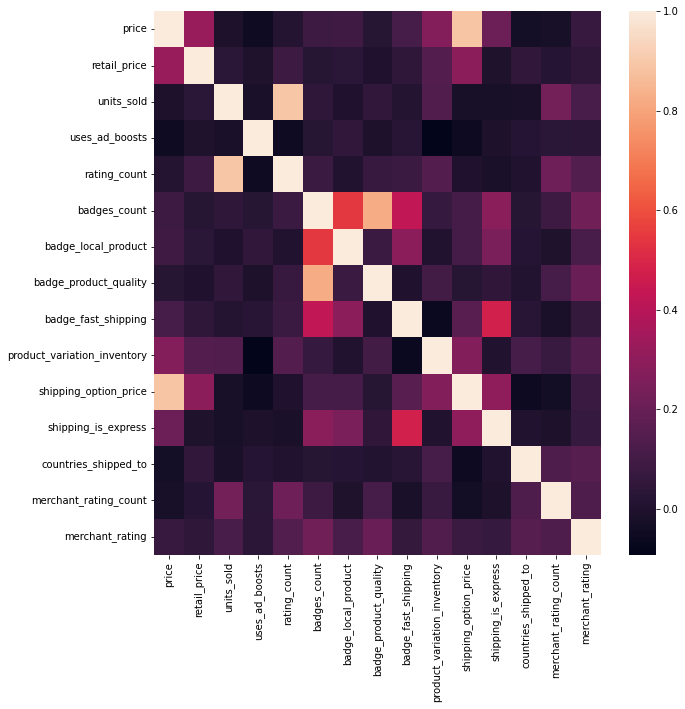

In [140]:
# setting the dimensions of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# drawing the plot
sns.heatmap(corr)
plt.show()

- Here in this plot we find (rating_count,units_sold) have a large value of correlations so we can drop any one of them and that will not effect on predications.
-Also, (shipping_option_price,price) have a large value of correlations so we can drop any one of them and that will not effect on predications.

In [141]:
value_product_variation_size_id = X['product_variation_size_id'].value_counts().reset_index()
index = value_product_variation_size_id[value_product_variation_size_id["product_variation_size_id"] <= 14 ]['index'].tolist()
X["product_variation_size_id"].fillna(X['product_variation_size_id'].value_counts().idxmax(), inplace=True)

In [142]:
X.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
0,8.00,7,10000,1,1670,0,0,0,0,M,50,3,0,30,66644,4.137582
1,8.00,7,1000,0,843,1,1,0,0,L,50,3,0,37,25752,4.256873
2,6.00,34,100,0,10,0,0,0,0,L,50,2,0,41,3897,3.928920
3,4.67,4,100,1,82,0,0,0,0,XS,5,1,0,25,7497,4.079365
4,8.00,11,1000,0,127,0,0,0,0,S,50,3,0,15,173,4.306358


In [143]:
X.shape

(1094, 16)

In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1094 non-null   float64
 1   retail_price                 1094 non-null   int64  
 2   units_sold                   1094 non-null   int64  
 3   uses_ad_boosts               1094 non-null   int64  
 4   rating_count                 1094 non-null   int64  
 5   badges_count                 1094 non-null   int64  
 6   badge_local_product          1094 non-null   int64  
 7   badge_product_quality        1094 non-null   int64  
 8   badge_fast_shipping          1094 non-null   int64  
 9   product_variation_size_id    1094 non-null   object 
 10  product_variation_inventory  1094 non-null   int64  
 11  shipping_option_price        1094 non-null   int64  
 12  shipping_is_express          1094 non-null   int64  
 13  countries_shipped_

In [145]:
# show the unique elements in "product_variation_size_id" columns to know if we need it or drop it .
X['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [146]:
# calculate the count of different value in this 50 rows in this column
X['product_variation_size_id'].value_counts().head(50)

S                              456
XS                             248
M                              135
XXS                             76
L                               29
S.                              13
XL                              12
XXL                             11
XXXS                             5
M.                               4
Size-XS                          4
Size S                           4
4XL                              4
XS.                              4
Size-S                           3
2XL                              3
10 ml                            3
s                                3
Size M                           2
35                               2
Size4XL                          2
Size -XXS                        2
SizeL                            2
25                               2
SIZE XS                          2
29                               2
S Pink                           2
XXXXXL                           2
33                  

In [147]:
# to clean the values in this column and make it include less categorical which help us to reduce numbers of columns incase using one-hotencoding
X['product_variation_size_id'] = X['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

<ipython-input-147-36f1ad1afc66>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['product_variation_size_id'] = X['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')


In [148]:
# replace different shapes and  string words with same thing in this columns 
X['product_variation_size_id'] = X['product_variation_size_id'].replace('2xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('3xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('4xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('5xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('6xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('x   l', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('sizel', 'l')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('size4xl', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('x   l', 'xl')
X['product_variation_size_id'] = X['product_variation_size_id'].replace('1 pc - xl', 'xl')

In [149]:
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'
# replace any nan cell with the word 'other' and apply change size method
X['product_variation_size_id'] = X['product_variation_size_id'].replace(np.nan, 'OTHER')
X['product_variation_size_id'] = X['product_variation_size_id'].apply(change_size)

<Axes: xlabel='product_variation_size_id', ylabel='units_sold'>

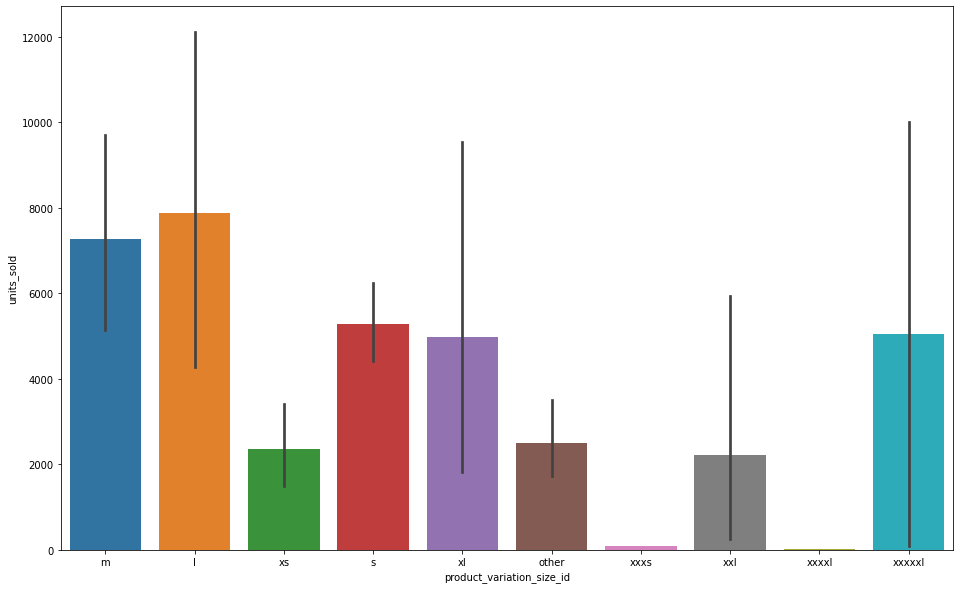

In [150]:
#plot the different elements in "product_variation_size_id"
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=X)

In [151]:
# Convert categorical variable into dummy/indicator variables in pandas.
X = pd.get_dummies(X, columns = [ 'product_variation_size_id'])


- Here I  had a challenge as i faced error which say there is columns in train_data which is not found in test_data so i find a solution for that 
  - First know the columns in train_data and also in test_data and compare them well 
  - drop the extra columns in train_data so now, we find the train and test data have the same shape

In [152]:
# Drop the extra column to solve the privios error.
X=X.drop(columns=["product_variation_size_id_xxxxxl"])

In [153]:
X.shape

(1094, 24)

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1094 non-null   float64
 1   retail_price                     1094 non-null   int64  
 2   units_sold                       1094 non-null   int64  
 3   uses_ad_boosts                   1094 non-null   int64  
 4   rating_count                     1094 non-null   int64  
 5   badges_count                     1094 non-null   int64  
 6   badge_local_product              1094 non-null   int64  
 7   badge_product_quality            1094 non-null   int64  
 8   badge_fast_shipping              1094 non-null   int64  
 9   product_variation_inventory      1094 non-null   int64  
 10  shipping_option_price            1094 non-null   int64  
 11  shipping_is_express              1094 non-null   int64  
 12  countries_shipped_to

In [155]:
# Now, all train_data is numeric with the correct shape
X

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,merchant_rating,product_variation_size_id_l,product_variation_size_id_m,product_variation_size_id_other,product_variation_size_id_s,product_variation_size_id_xl,product_variation_size_id_xs,product_variation_size_id_xxl,product_variation_size_id_xxxs,product_variation_size_id_xxxxl
0,8.00,7,10000,1,1670,0,0,0,0,50,...,4.137582,0,1,0,0,0,0,0,0,0
1,8.00,7,1000,0,843,1,1,0,0,50,...,4.256873,1,0,0,0,0,0,0,0,0
2,6.00,34,100,0,10,0,0,0,0,50,...,3.928920,1,0,0,0,0,0,0,0,0
3,4.67,4,100,1,82,0,0,0,0,5,...,4.079365,0,0,0,0,0,1,0,0,0
4,8.00,11,1000,0,127,0,0,0,0,50,...,4.306358,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,0,0,50,...,4.311066,0,0,0,1,0,0,0,0,0
1090,5.00,5,1000,0,377,1,0,1,0,31,...,4.422521,0,0,1,0,0,0,0,0,0
1091,9.00,48,1000,1,135,0,0,0,0,50,...,3.748794,0,1,0,0,0,0,0,0,0
1092,11.00,10,10000,1,1479,0,0,0,0,50,...,3.936382,0,1,0,0,0,0,0,0,0


## preparation for test set

In [156]:
# check the shape of test data
test_df.shape

(479, 33)

In [157]:
# make a copy of test_data to do preprocessing
test_data=test_df.copy()

In [158]:
# shoe the first 5 rows of test data
test_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [159]:
test_data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,124.0,479.000000,479.000000,479.000000,479.000000
mean,8.335846,22.321503,3928.682672,0.434238,830.586639,0.085595,0.016701,0.054280,0.014614,33.707724,2.346555,0.002088,40.392484,49.757829,1.0,25837.699374,4.023561,0.116910,817.501044
std,3.708964,26.773515,8179.915708,0.496175,1856.340336,0.321771,0.128284,0.226806,0.120126,21.128372,0.977222,0.045691,20.560057,2.742776,0.0,57241.300129,0.214374,0.321649,454.150616
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,2.000000,1.0,0.000000,2.333333,0.000000,0.000000
25%,5.790000,7.000000,100.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,31.000000,50.000000,1.0,2091.000000,3.914894,0.000000,410.500000
50%,8.000000,10.000000,1000.000000,0.000000,158.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7363.000000,4.032956,0.000000,863.000000
75%,11.000000,26.000000,5000.000000,1.000000,856.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,27175.000000,4.155606,0.000000,1214.500000
max,20.000000,168.000000,100000.000000,1.000000,17980.000000,3.000000,1.000000,1.000000,1.000000,50.000000,7.000000,1.000000,140.000000,50.000000,1.0,839882.000000,5.000000,1.000000,1568.000000


### check duplication

In [160]:
#for test
duplicated_test= test_data[train_data.duplicated()]
duplicated_test

<ipython-input-160-e4addcc1d9de>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicated_test= test_data[train_data.duplicated()]


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
118,2.67,67,EUR,10,0,0,0,0,0,0,...,hehaiyan,85 % avis positifs (13 notes),13,3.692308,5e606b6e29e7867135073fbe,0,NaN,summer,2020-08,1129
124,9.00,19,EUR,5000,1,588,0,0,0,0,...,yulingh,"85 % avis positifs (1,181 notes)",1181,4.015241,5d55015e3cc46d5c40a15c19,0,NaN,summer,2020-08,613
172,8.00,84,EUR,10000,0,3679,1,0,1,0,...,johnson007,"89 % avis positifs (80,713 notes)",80713,4.187814,56dce88d21396a16a47eff39,0,NaN,summer,2020-08,587
243,4.81,30,EUR,3,0,0,0,0,0,0,...,choicstore,"85 % avis positifs (11,378 notes)",11378,3.990508,564d8f2f3a698c01d97fbb81,0,NaN,summer,2020-08,115
275,9.00,32,EUR,1000,0,567,0,0,0,0,...,terbuer,"87 % avis positifs (9,395 notes)",9395,4.110059,575cfe470551415caa5505b5,0,NaN,summer,2020-08,407
286,9.00,14,EUR,10000,0,644,0,0,0,0,...,pumpkin262012,"(3,972 notes)",3972,3.849194,582872761004352e57ee38a1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1276
313,5.86,5,EUR,1000,0,150,0,0,0,0,...,wonderful1688,"86 % avis positifs (9,308 notes)",9308,3.993017,545dab9f5f313f1e28cb1a2f,0,NaN,summer,2020-08,1035
336,13.00,11,EUR,1000,0,350,0,0,0,0,...,wdhdage,"82 % avis positifs (8,821 notes)",8821,3.872010,5aa1f31308a2240a052e9a1a,0,NaN,summer,2020-08,888
353,8.00,7,EUR,10000,0,2182,0,0,0,0,...,honestfashionshopping,"91 % avis positifs (10,258 notes)",10258,4.243712,570d017b1b4ca758e18e407d,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,624
356,11.00,26,EUR,1000,0,72,0,0,0,0,...,huaxianglarou,"90 % avis positifs (4,516 notes)",4516,4.231842,5ae93337d204cc177313f242,0,NaN,summer,2020-08,36


### check Null

In [161]:
test_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

### check unique data

In [162]:
drop_column_test=check_unique(test_data)
drop_column_test

['currency_buyer',
 'tags',
 'has_urgency_banner',
 'urgency_text',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'theme',
 'crawl_month']

In [163]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it 
test_data.urgency_text.value_counts()

Quantité limitée !    124
Name: urgency_text, dtype: int64

In [164]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it
test_data.urgency_text.value_counts()

Quantité limitée !    124
Name: urgency_text, dtype: int64

In [165]:
# Here I found all the columns nearly have the same value so it is not benefits to us and we can drop it
test_data.inventory_total.value_counts()

50    474
24      1
2       1
38      1
30      1
40      1
Name: inventory_total, dtype: int64

In [166]:
# collect all useless columns on one list to drop them 
dropped=["currency_buyer","merchant_name","merchant_info_subtitle","merchant_id","merchant_profile_picture",
         "merchant_has_profile_picture","theme","crawl_month","id","has_urgency_banner","urgency_text","tags","inventory_total","origin_country"]
test_data.drop(dropped, axis=1, inplace=True)

In [167]:
test_data.shape

(479, 19)

In [168]:
test_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_title,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,0,0,0,0,white,XS,5,Livraison standard,2,0,139,liyang163,3,2.333333
1,7.00,7,5000,0,579,0,0,0,0,black,XS,50,Livraison standard,2,0,31,singing the song,4213,4.058391
2,5.00,16,1000,1,62,0,0,0,0,blue,XS,20,Livraison standard,2,0,41,Surper boutique,10501,4.029235
3,18.00,27,5000,1,1903,0,0,0,0,blue,M,50,Livraison standard,5,0,42,postonny,15855,4.052917
4,12.00,81,20000,0,1799,0,0,0,0,white,M,50,Livraison standard,3,0,38,fashionforgirls,151914,4.127921


### Data Cleaning

In [169]:
#more cleaning for test data
test_data=test_data.drop(columns=["shipping_option_name","merchant_title",'product_color'])
test_data

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,0,0,0,0,XS,5,2,0,139,3,2.333333
1,7.00,7,5000,0,579,0,0,0,0,XS,50,2,0,31,4213,4.058391
2,5.00,16,1000,1,62,0,0,0,0,XS,20,2,0,41,10501,4.029235
3,18.00,27,5000,1,1903,0,0,0,0,M,50,5,0,42,15855,4.052917
4,12.00,81,20000,0,1799,0,0,0,0,M,50,3,0,38,151914,4.127921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,M,50,4,0,35,572,3.367133
475,6.00,17,5000,1,817,0,0,0,0,XXS,1,2,0,41,50864,4.079644
476,4.83,51,50,1,1,0,0,0,0,XS,3,1,0,39,57,3.824561
477,3.00,3,100,1,8,0,0,0,0,34,3,1,0,26,1086,4.056169


In [170]:
# check if there is any null and Congrats there is no null finally
test_data.isnull().sum()

price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
product_variation_size_id      2
product_variation_inventory    0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
merchant_rating_count          0
merchant_rating                0
dtype: int64

In [171]:
test_data.mode().iloc[0]

price                               8.0
retail_price                          7
units_sold                          100
uses_ad_boosts                        0
rating_count                          0
badges_count                          0
badge_local_product                   0
badge_product_quality                 0
badge_fast_shipping                   0
product_variation_size_id             S
product_variation_inventory          50
shipping_option_price                 2
shipping_is_express                   0
countries_shipped_to                 43
merchant_rating_count             32168
merchant_rating                3.884544
Name: 0, dtype: object

In [172]:
# Fill the null data with the values of first column
col=['product_variation_size_id']
test_data[col]=test_data[col].fillna(test_data.mode().iloc[0])

In [173]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        479 non-null    float64
 1   retail_price                 479 non-null    int64  
 2   units_sold                   479 non-null    int64  
 3   uses_ad_boosts               479 non-null    int64  
 4   rating_count                 479 non-null    int64  
 5   badges_count                 479 non-null    int64  
 6   badge_local_product          479 non-null    int64  
 7   badge_product_quality        479 non-null    int64  
 8   badge_fast_shipping          479 non-null    int64  
 9   product_variation_size_id    479 non-null    object 
 10  product_variation_inventory  479 non-null    int64  
 11  shipping_option_price        479 non-null    int64  
 12  shipping_is_express          479 non-null    int64  
 13  countries_shipped_to

In [174]:
# show the correlation between features 
corr1 = test_data.corr()
corr1

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
price,1.000000,0.255433,-0.074049,-0.122793,-0.040618,0.002507,0.018393,-0.027535,0.039062,0.279683,0.833194,-0.028836,-0.031510,-0.028266,0.002889
retail_price,0.255433,1.000000,-0.039147,-0.114470,-0.021297,0.007241,0.003306,0.001254,0.013497,0.055415,0.191075,-0.027912,-0.004452,0.080581,0.087763
units_sold,-0.074049,-0.039147,1.000000,-0.010317,0.924822,0.049140,-0.026176,0.101548,-0.032150,0.128187,-0.062755,0.033984,-0.003727,0.461675,0.127184
uses_ad_boosts,-0.122793,-0.114470,-0.010317,1.000000,-0.027145,0.081193,0.083026,0.031786,0.068806,-0.235920,-0.073709,-0.040071,-0.089954,0.026786,-0.144052
rating_count,-0.040618,-0.021297,0.924822,-0.027145,1.000000,0.074412,-0.014730,0.125121,-0.021185,0.106796,-0.023433,0.048773,-0.018015,0.415863,0.142886
badges_count,0.002507,0.007241,0.049140,0.081193,0.074412,1.000000,0.624157,0.738859,0.617054,-0.048010,0.105062,0.414708,0.026218,-0.021249,0.189435
badge_local_product,0.018393,0.003306,-0.026176,0.083026,-0.014730,0.624157,1.000000,0.040680,0.527154,-0.039875,0.087238,0.350955,0.012580,-0.037474,0.111846
badge_product_quality,-0.027535,0.001254,0.101548,0.031786,0.125121,0.738859,0.040680,1.000000,0.047610,0.027765,0.028218,0.190919,0.024583,0.007696,0.162338
badge_fast_shipping,0.039062,0.013497,-0.032150,0.068806,-0.021185,0.617054,0.527154,0.047610,1.000000,-0.138439,0.134981,0.375585,0.010379,-0.031429,0.081476
product_variation_inventory,0.279683,0.055415,0.128187,-0.235920,0.106796,-0.048010,-0.039875,0.027765,-0.138439,1.000000,0.256707,0.035307,0.132626,0.123253,0.206977


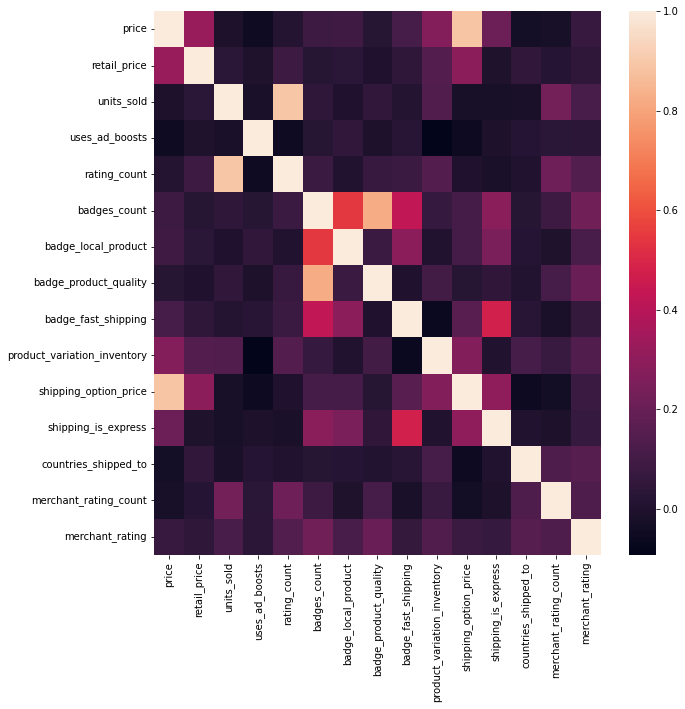

In [175]:
# setting the dimensions of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# drawing the plot
sns.heatmap(corr)
plt.show()

In [176]:
value_product_variation_size_id = test_data['product_variation_size_id'].value_counts().reset_index()
index = value_product_variation_size_id[value_product_variation_size_id["product_variation_size_id"] <= 14 ]['index'].tolist()
test_data["product_variation_size_id"].fillna(test_data['product_variation_size_id'].value_counts().idxmax(), inplace=True)

In [177]:
test_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,0,0,0,0,XS,5,2,0,139,3,2.333333
1,7.00,7,5000,0,579,0,0,0,0,XS,50,2,0,31,4213,4.058391
2,5.00,16,1000,1,62,0,0,0,0,XS,20,2,0,41,10501,4.029235
3,18.00,27,5000,1,1903,0,0,0,0,M,50,5,0,42,15855,4.052917
4,12.00,81,20000,0,1799,0,0,0,0,M,50,3,0,38,151914,4.127921


In [178]:
test_data.shape

(479, 16)

In [179]:
test_data

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,0,0,0,0,XS,5,2,0,139,3,2.333333
1,7.00,7,5000,0,579,0,0,0,0,XS,50,2,0,31,4213,4.058391
2,5.00,16,1000,1,62,0,0,0,0,XS,20,2,0,41,10501,4.029235
3,18.00,27,5000,1,1903,0,0,0,0,M,50,5,0,42,15855,4.052917
4,12.00,81,20000,0,1799,0,0,0,0,M,50,3,0,38,151914,4.127921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,M,50,4,0,35,572,3.367133
475,6.00,17,5000,1,817,0,0,0,0,XXS,1,2,0,41,50864,4.079644
476,4.83,51,50,1,1,0,0,0,0,XS,3,1,0,39,57,3.824561
477,3.00,3,100,1,8,0,0,0,0,34,3,1,0,26,1086,4.056169


In [180]:
test_data['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'S(Pink & Black)', 'S(bust 88cm)',
       'SizeL', 'SIZE-XXS', 'XL', '1', '32/L', 'daughter 24M', 'XXXL',
       '5XL', '4', 'XS.', '1 pc.', '4XL', 'Size S', '2XL', 'S.', 's',
       '3XL', '80 X 200 CM', 'EU 35', '34', 'XXXXL', 'XXL', '100pcs',
       'SIZE XS', 'first  generation', '2pcs', 'Size--S', 'SIZE-4XL',
       'L.', 'Suit-S', 'Women Size 37', 'S Diameter 30cm', 'XXXS',
       'Size-L', 'Size S.', 'AU plug Low quality', '3 layered anklet',
       '17', 'size S', 'US 6.5 (EU 37)', 'US5.5-EU35', 'EU39(US8)', '36',
       '33', 'One Size'], dtype=object)

In [181]:
test_data['product_variation_size_id'].value_counts().head(50)

S                      199
XS                     108
M                       65
XXS                     24
L                       20
S.                       5
XL                       5
XXL                      4
SIZE XS                  2
EU 35                    2
3XL                      2
s                        2
34                       2
XXXL                     1
AU plug Low quality      1
L.                       1
Suit-S                   1
Women Size 37            1
S Diameter 30cm          1
XXXS                     1
Size-L                   1
Size S.                  1
3 layered anklet         1
Size--S                  1
17                       1
size S                   1
US 6.5 (EU 37)           1
US5.5-EU35               1
EU39(US8)                1
36                       1
33                       1
SIZE-4XL                 1
2pcs                     1
5XL                      1
32/L                     1
4                        1
XS.                      1
1

In [182]:
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

<ipython-input-182-9a47a406f82e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['product_variation_size_id'] = test_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')


In [183]:
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('2xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('3xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('4xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('5xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('6xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('x   l', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('sizel', 'l')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('size4xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('x   l', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('1 pc - xl', 'xl')

In [184]:
def change_size(cl):
    if cl in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return cl
    else:
        return 'other'

test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace(np.nan, 'OTHER')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].apply(change_size)

<Axes: xlabel='product_variation_size_id', ylabel='units_sold'>

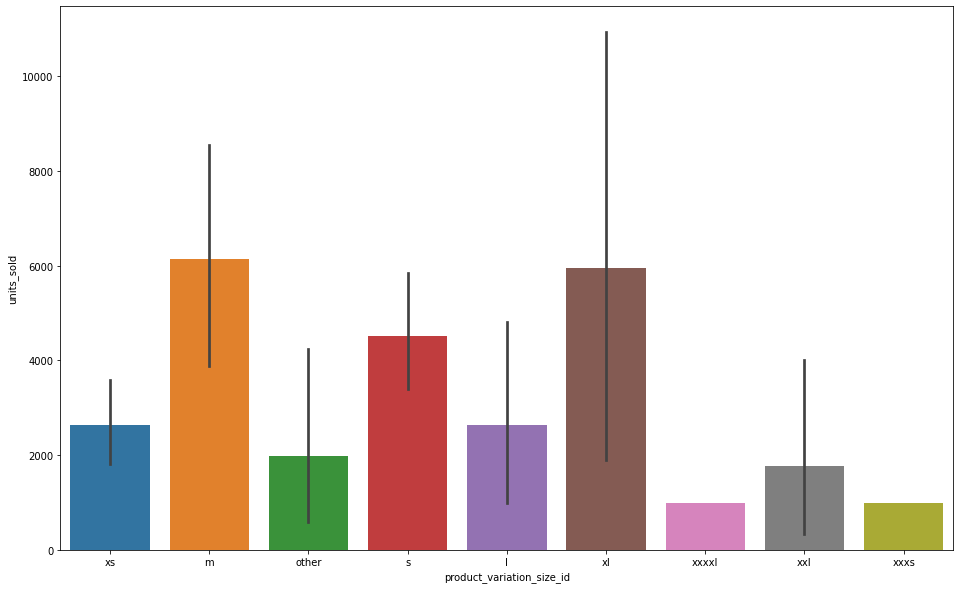

In [185]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_variation_size_id", y="units_sold", data=test_data)

In [186]:
test_data = pd.get_dummies(test_data, columns = [ 'product_variation_size_id'])

In [187]:
X.shape

(1094, 24)

In [188]:
test_data.shape


(479, 24)

In [189]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            479 non-null    float64
 1   retail_price                     479 non-null    int64  
 2   units_sold                       479 non-null    int64  
 3   uses_ad_boosts                   479 non-null    int64  
 4   rating_count                     479 non-null    int64  
 5   badges_count                     479 non-null    int64  
 6   badge_local_product              479 non-null    int64  
 7   badge_product_quality            479 non-null    int64  
 8   badge_fast_shipping              479 non-null    int64  
 9   product_variation_inventory      479 non-null    int64  
 10  shipping_option_price            479 non-null    int64  
 11  shipping_is_express              479 non-null    int64  
 12  countries_shipped_to  

In [190]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            1094 non-null   float64
 1   retail_price                     1094 non-null   int64  
 2   units_sold                       1094 non-null   int64  
 3   uses_ad_boosts                   1094 non-null   int64  
 4   rating_count                     1094 non-null   int64  
 5   badges_count                     1094 non-null   int64  
 6   badge_local_product              1094 non-null   int64  
 7   badge_product_quality            1094 non-null   int64  
 8   badge_fast_shipping              1094 non-null   int64  
 9   product_variation_inventory      1094 non-null   int64  
 10  shipping_option_price            1094 non-null   int64  
 11  shipping_is_express              1094 non-null   int64  
 12  countries_shipped_to

## Spilt the Dataset

In [191]:
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_VAL, y_train, y_VAL = train_test_split(X, y, test_size=0.2, random_state=2)


## Naive Bayes

#### first experiment

- First, I use naive bayes alghorithm to train our data but it is not good enough although i tried it with different Hyperparameters and the accuracy of predict on validation dataset is still not good

In [192]:
# here pass 0.03 as hyperparamter to model while fitting the train data
nb_model = GaussianNB(var_smoothing = 0.03)

In [193]:
# fit the model 
nb_model.fit(X_train, y_train)
# predict on vaildation data usiong our model 
y_prd_val = nb_model.predict(X_VAL)
# print confusion matrix 
cm = confusion_matrix(y_VAL, y_prd_val)
cm

array([[  0,   0,   2,   0,   0],
       [  0,   0,  26,   1,   0],
       [  0,   0, 157,   3,   0],
       [  0,   0,  29,   0,   0],
       [  0,   0,   1,   0,   0]])

In [194]:
#print the classifiation report to know all detailes about evaluations of data
print(classification_report(y_VAL, y_prd_val))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        27
         4.0       0.73      0.98      0.84       160
         5.0       0.00      0.00      0.00        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.72       219
   macro avg       0.15      0.20      0.17       219
weighted avg       0.53      0.72      0.61       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### submission result

In [195]:
# submission the file to try our model on test data on kaggle
product_id = id
predictions = nb_model.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_nb1.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


#### Second experiment

- Here I change the hyperparameter to improve the accuracy of model to can predict the new data well.

In [196]:
# duild the model 
nb_model_2 = GaussianNB(var_smoothing = 0.9)

In [197]:
#fit the model 
nb_model_2.fit(X_train, y_train)
# predict the model on vaildation data
y_prd_val_2 = nb_model_2.predict(X_VAL)
#print the confusion matrix 
cm = confusion_matrix(y_VAL, y_prd_val_2)
cm

array([[  0,   0,   2,   0,   0],
       [  0,   0,  26,   1,   0],
       [  0,   0, 160,   0,   0],
       [  0,   0,  29,   0,   0],
       [  0,   0,   1,   0,   0]])

In [198]:
print(classification_report(y_VAL, y_prd_val_2))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        27
         4.0       0.73      1.00      0.85       160
         5.0       0.00      0.00      0.00        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.73       219
   macro avg       0.15      0.20      0.17       219
weighted avg       0.54      0.73      0.62       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### submission result

In [199]:
# submission the file to try our model on test data on kaggle
product_id = id
predictions = nb_model_2.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_nb2.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


- Although that the accuracy and `f1-score` is still very low and the model can't learn well which means happening ` Underfitting` which means the model can"t fit well.😭😭😱
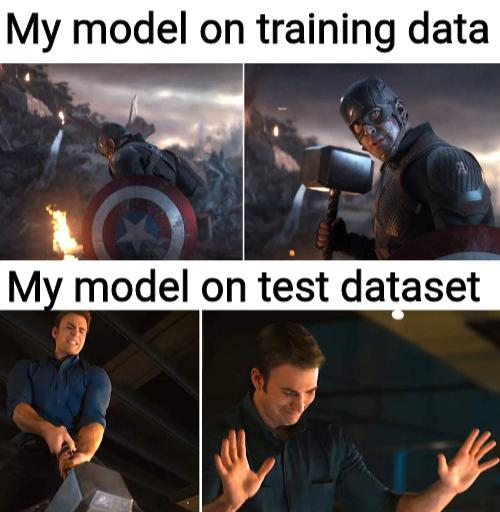

- Now i don't know use svm or Decision tree or random forest.
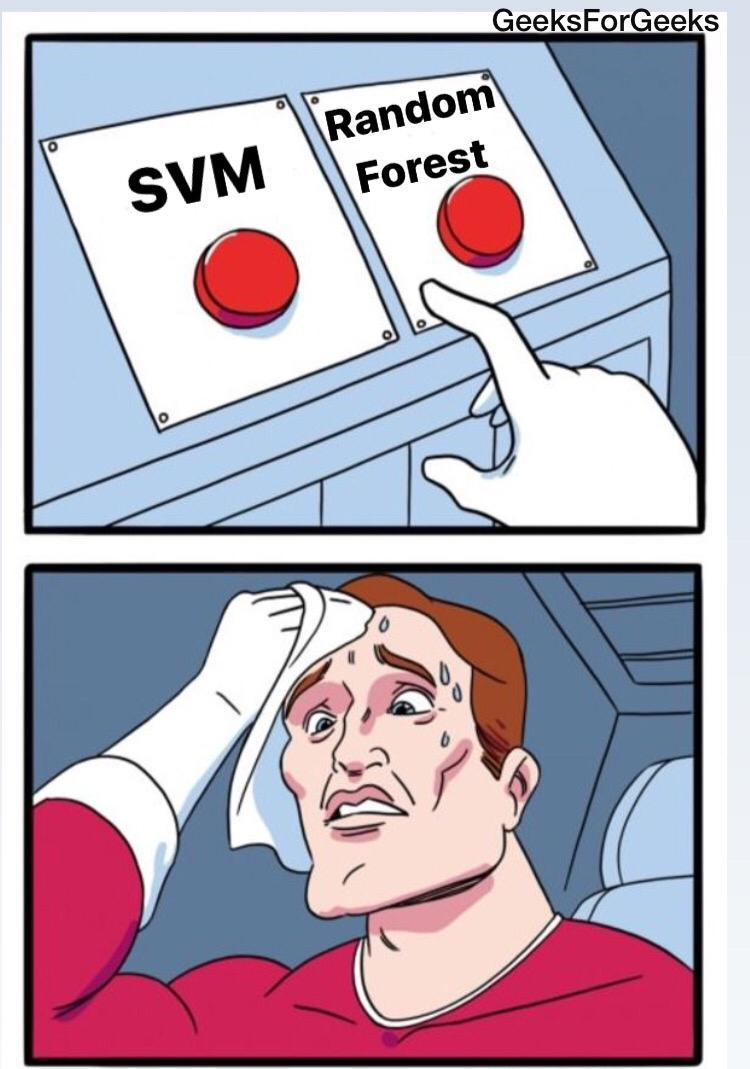

## SVM

#### the first experience

In [200]:
# build the model with specific hyperparameter
from sklearn.svm import SVC # "Support vector classifier"  
classifier_SVM = SVC(kernel='rbf',gamma = 0.001 , C = 10, random_state=0) 
# fit the model 
classifier_SVM.fit(X_train, y_train)  

SVC(C=10, gamma=0.001, random_state=0)

In [201]:
# predict the model on validation data
svm_y_prd= classifier_SVM.predict(X_VAL)
# print the confusion matrix
cm = confusion_matrix(y_VAL, svm_y_prd)
cm

array([[  1,   1,   0,   0,   0],
       [  0,  11,  16,   0,   0],
       [  0,   4, 154,   2,   0],
       [  1,   0,  25,   3,   0],
       [  0,   0,   1,   0,   0]])

In [202]:
print("Training Accurcy: ", classifier_SVM.score(X_train, y_train))
print("Validation Accurcy: ", classifier_SVM.score(X_VAL, y_VAL))

Training Accurcy:  0.992
Validation Accurcy:  0.771689497716895


- Here we notic that acuraccy is very high on train_data but, Unfortunately when we test it on new data(vaildation data) the accuracy is going in bad way.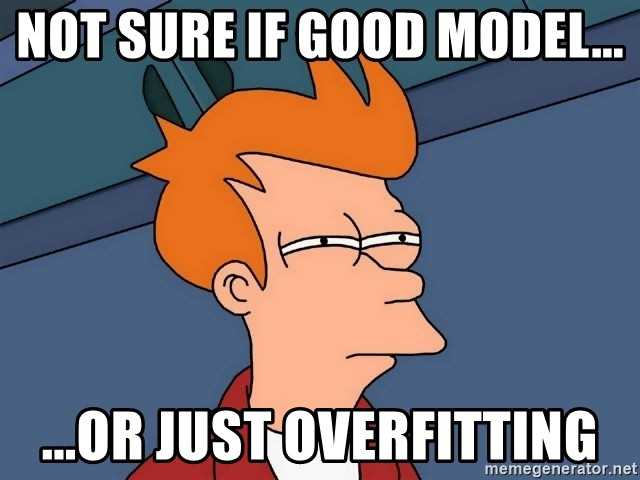

In [203]:
print('Train/Test split results:')
print(classifier_SVM.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_VAL, svm_y_prd))

Train/Test split results:
SVC accuracy is 0.772


In [204]:
print(classification_report(y_VAL, svm_y_prd))

              precision    recall  f1-score   support

         2.0       0.50      0.50      0.50         2
         3.0       0.69      0.41      0.51        27
         4.0       0.79      0.96      0.87       160
         5.0       0.60      0.10      0.18        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.77       219
   macro avg       0.51      0.39      0.41       219
weighted avg       0.74      0.77      0.72       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### submission result

In [205]:
# submission the file to try our model on test data on kaggle
product_id = id
predictions = classifier_SVM.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_svm1.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


#### Second experiment with different hyperparamter

- here i try the model with another hyperparameters,hoping the accuracy increase.

In [206]:
#buid the model 
from sklearn.svm import SVC # "Support vector classifier"  
classifier_SVM_2 = SVC(kernel='rbf',gamma = 0.00003 , C = 15, random_state=0)
#fit the model  
classifier_SVM_2.fit(X_train, y_train) 

SVC(C=15, gamma=3e-05, random_state=0)

In [207]:
#predict with new data 
svm_y_prd_2= classifier_SVM_2.predict(X_VAL)
# print confusion matrix
cm = confusion_matrix(y_VAL, svm_y_prd_2)
cm

array([[  1,   1,   0,   0,   0],
       [  0,  12,  14,   1,   0],
       [  0,  10, 145,   5,   0],
       [  0,   3,  15,  11,   0],
       [  0,   0,   1,   0,   0]])

In [208]:
print("Training Accurcy: ", classifier_SVM_2.score(X_train, y_train))
print("Validation Accurcy: ", classifier_SVM_2.score(X_VAL, y_VAL))

Training Accurcy:  0.944
Validation Accurcy:  0.771689497716895


In [209]:
print(classification_report(y_VAL, svm_y_prd_2))

              precision    recall  f1-score   support

         2.0       1.00      0.50      0.67         2
         3.0       0.46      0.44      0.45        27
         4.0       0.83      0.91      0.87       160
         5.0       0.65      0.38      0.48        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.77       219
   macro avg       0.59      0.45      0.49       219
weighted avg       0.76      0.77      0.76       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### submission result

In [210]:
# submission the file to try our model on test data on kaggle
product_id = id
predictions = classifier_SVM_2.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_svm2.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


- the accuracy increases but it is still not good enough so i will use another alghorithm such as decision tree.

## Decision Tree

In [211]:
# build the model with grid search to try different hyperparameters and choose the best model with the best hyperparameter

dec_tree = tree.DecisionTreeClassifier()
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_model = GridSearchCV(dec_tree , tree_param)

In [212]:
#fit the model
dt_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [213]:
#dtermine the best model 
dt_best_model = dt_model.best_estimator_
dt_best_model

DecisionTreeClassifier(max_depth=5)

In [214]:
print("Training Accurcy: ", dt_best_model.score(X_train, y_train))
print("Validation Accurcy: ", dt_best_model.score(X_VAL, y_VAL))

Training Accurcy:  0.8171428571428572
Validation Accurcy:  0.7579908675799086


- nearly, we can say the model is good enough💃😍🤥

In [215]:
# predict the model on validation data 
dt_y_prd_val = dt_best_model.predict(X_VAL)
# print the confusion matrix
cm = confusion_matrix(y_VAL, dt_y_prd_val)
cm

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   1,   0],
       [  0,   0,   5,  19,   3,   0],
       [  0,   1,   9, 143,   7,   0],
       [  1,   0,   2,   8,  18,   0],
       [  0,   0,   0,   0,   1,   0]])

In [216]:
print(classification_report(y_VAL, dt_y_prd_val))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         2
         3.0       0.29      0.19      0.23        27
         4.0       0.84      0.89      0.87       160
         5.0       0.60      0.62      0.61        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.76       219
   macro avg       0.29      0.28      0.28       219
weighted avg       0.73      0.76      0.74       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

### submission result

In [217]:
# submission the file to try our model on test data on kaggle
product_id = id
predictions = dt_best_model.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_dt.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


## Random Forest

- i try using Ranom forest to increase the accuracy more 💃💃🤭

In [218]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier
 
 # create regressor object
RandomF = RandomForestClassifier()
 
# fit the regressor with x and y data
RandomF.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
print("Training Accurcy: ", RandomF.score(X_train, y_train))
print("Validation Accurcy: ", RandomF.score(X_VAL, y_VAL))

Training Accurcy:  0.9942857142857143
Validation Accurcy:  0.7945205479452054


- That is the best model with the best accuracy.😈🤩

In [220]:
# predict the new data
dt_y_prd_val = RandomF.predict(X_VAL)
#print the confusion matrix 
cm = confusion_matrix(y_VAL, dt_y_prd_val)
cm

array([[  1,   1,   0,   0,   0],
       [  0,   9,  16,   2,   0],
       [  0,   3, 146,  11,   0],
       [  0,   0,  11,  18,   0],
       [  0,   0,   0,   1,   0]])

In [221]:
print(classification_report(y_VAL, dt_y_prd_val))

              precision    recall  f1-score   support

         2.0       1.00      0.50      0.67         2
         3.0       0.69      0.33      0.45        27
         4.0       0.84      0.91      0.88       160
         5.0       0.56      0.62      0.59        29
         6.0       0.00      0.00      0.00         1

    accuracy                           0.79       219
   macro avg       0.62      0.47      0.52       219
weighted avg       0.79      0.79      0.78       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Submission result

In [222]:
product_id = id
predictions = RandomF.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('pred_walkthrough_randomf_rf.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


## Final Result

some tries to get final result

In [223]:
id

0       937
1       270
2       308
3       913
4       403
       ... 
474    1166
475    1416
476      63
477     626
478     196
Name: id, Length: 479, dtype: int64

In [224]:
test_data

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,merchant_rating,product_variation_size_id_l,product_variation_size_id_m,product_variation_size_id_other,product_variation_size_id_s,product_variation_size_id_xl,product_variation_size_id_xs,product_variation_size_id_xxl,product_variation_size_id_xxxs,product_variation_size_id_xxxxl
0,5.75,5,10,1,0,0,0,0,0,5,...,2.333333,0,0,0,0,0,1,0,0,0
1,7.00,7,5000,0,579,0,0,0,0,50,...,4.058391,0,0,0,0,0,1,0,0,0
2,5.00,16,1000,1,62,0,0,0,0,20,...,4.029235,0,0,0,0,0,1,0,0,0
3,18.00,27,5000,1,1903,0,0,0,0,50,...,4.052917,0,1,0,0,0,0,0,0,0
4,12.00,81,20000,0,1799,0,0,0,0,50,...,4.127921,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,50,...,3.367133,0,1,0,0,0,0,0,0,0
475,6.00,17,5000,1,817,0,0,0,0,1,...,4.079644,0,0,1,0,0,0,0,0,0
476,4.83,51,50,1,1,0,0,0,0,3,...,3.824561,0,0,0,0,0,1,0,0,0
477,3.00,3,100,1,8,0,0,0,0,3,...,4.056169,0,0,1,0,0,0,0,0,0


# Questions and their answers

## Why Data Mining is a misnomer? What is another preferred name?
- Data Mining is considered a misnomer because it implies that the process is solely about extracting data from a source, when in reality, it involves much more than just that. Data mining involves various steps such as data cleaning, data integration, data transformation, and data analysis to extract useful insights and knowledge from the data.
- Another preferred name for data mining is Knowledge Discovery in Databases (KDD), as it more accurately describes the process of extracting useful information and knowledge from large datasets. KDD emphasizes the importance of discovering patterns, relationships, and trends in the data that can be used for decision-making and problem-solving.


## What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
- The general knowledge discovery process includes the following steps:
  -  Data Selection: Determining which data to use for analysis.
  -  Data Cleaning: Identifying and correcting errors or inconsistencies in   the data.
  -  Data Integration: Combining data from multiple sources into a single dataset.
  - Data Transformation: Converting the data into a suitable format for analysis.
  -  Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.
  -  Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.
  -  Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.
  -  Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.
- A data engineer is responsible for the design, construction, and maintenance of the systems that collect, store, and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.
- On the other hand, a data scientist or AI engineer uses statistical and machine learning techniques to analyze data and build predictive models. They also work on developing algorithms and software systems that can automate the process of data analysis and decision-making.
- While there is some overlap in their skill sets, the main difference between a data engineer and a data scientist/AI engineer is their focus. A data engineer is focused on ensuring that data is collected, stored, and managed effectively, while a data scientist/AI engineer is focused on extracting insights and knowledge from the data to drive decision-making.


## In data mining, what is the difference between prediction and categorization
- Prediction is a type of data mining task that involves using historical data to make predictions about future events or outcomes. For example, predicting whether a customer will buy a product, or whether a machine will break down in the future.
- Categorization, on the other hand, involves grouping data into predefined categories or classes based on certain criteria. For example, categorizing customers based on their preferences or interests, or categorizing emails as spam or not spam.
- The main difference between prediction and categorization is that prediction involves making specific, quantitative predictions about future events or outcomes, while categorization involves grouping data into broader categories based on certain criteria.

## Why data science/machine learning is a bad idea in the context of information security?
- Data science and machine learning are not inherently bad ideas in the context of information security, but there are certain risks and challenges involved in their implementation.
- One of the main risks is the potential for bias in the data and models used for analysis. If the data used to train a machine learning algorithm is biased or incomplete, the resulting model will also be biased and may produce inaccurate or unfair results. This can be especially problematic in the context of information security, where decisions based on inaccurate or biased models could lead to security breaches or other negative outcomes.
- Another challenge is the need for privacy and security in the handling of sensitive data. In the context of information security, data may contain sensitive information such as passwords, financial data, or personal information that must be protected from unauthorized access or disclosure. Machine learning models may also be vulnerable to attacks such as adversarial attacks or model poisoning, which can be used to manipulate the results of the analysis.
- Overall, data science and machine learning can be powerful tools for improving information security, but they must be implemented carefully and with an understanding of the unique risks and challenges involved.

## What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
- The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.
- Confidentiality refers to the protection of sensitive information from unauthorized access or disclosure. In the context of AI systems and pipelines, confidentiality can be achieved through measures such as access controls, data encryption, and data masking.
- Integrity refers to the accuracy and consistency of data and systems. In the context of AI systems and pipelines, integrity can be ensured through measures such as data validation, error checking, and version control.
- Availability refers to the availability and accessibility of data and systems. In the context of AI systems and pipelines, availability can be ensured through measures such as backup and recovery procedures, redundancy, and load balancing.
- By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure the availability and accessibility of data and systems (availability). This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.